In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
import os
from whittaker_smooth import whittaker_smooth

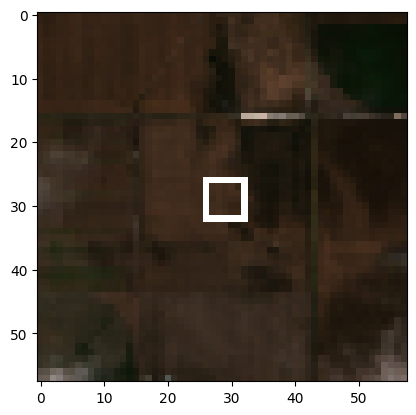

In [3]:
IMGS_PATH = '/home/mauricio/code/Plant-Growth-Cycle-based-on-geospatial-data/Manitoba1-1/'
bands =  ['B4','B3','B2','B8']

# Dict of the images.
images = utils.load_landsat_image(IMGS_PATH, bands)

# Get the days after plant and the dates.
days, dates, hours = utils.images_time_info(images.keys())

# Calculate the NDVI series over the crop.
ndvi_series = utils.generate_ndvi_time_series(images)

{'Kansas2019': array([0.29595997, 0.27797017, 0.26560902, 0.2592098 , 0.2544732 ,
        0.24694702, 0.23326059, 0.21405988, 0.20165164, 0.19797516,
        0.19613096, 0.1942866 , 0.19713813, 0.20304648, 0.20797072,
        0.20813857, 0.2056642 , 0.2083639 , 0.22428794, 0.25904165,
        0.29057205, 0.30579862, 0.30947979, 0.30664334, 0.30231702,
        0.3015286 , 0.30930586, 0.33084441, 0.37657977, 0.45080792,
        0.51588166, 0.55375113, 0.58251199, 0.64391959, 0.73626394,
        0.79084184, 0.8193382 , 0.83690331, 0.85345209, 0.87862962,
        0.91127289, 0.93561641, 0.9423293 , 0.9402349 , 0.93842016,
        0.94131412, 0.94938114, 0.95649785, 0.96709342, 0.97552402,
        0.98165791, 0.9876422 , 0.98920593, 0.98878976, 0.98704872,
        0.98078293, 0.97133545, 0.96239156, 0.95350064, 0.94638701,
        0.94278894, 0.93591213, 0.91246445, 0.87702644, 0.85700789,
        0.84484778, 0.82937531, 0.81101051, 0.79521403, 0.78401511,
        0.77483924, 0.76497127, 0.

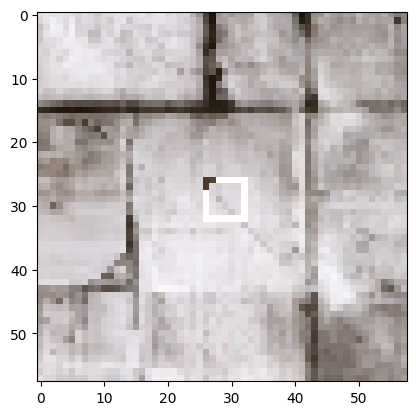

In [7]:
ndvi_dict = {}
bands =  ['B4','B3','B2','B8']
for i in range(2019,2022):
    
    IMGS_PATH = f'/home/mauricio/code/Plant-Growth-Cycle-based-on-geospatial-data/Kansas{i}/'
    # Dict of the images.
    images = utils.load_landsat_image(IMGS_PATH, bands)
    # Get the days after plant and the dates.
    days, dates, hours = utils.images_time_info(images.keys())

    ndvi_series = utils.generate_ndvi_time_series(images)
    ndvi_series = whittaker_smooth(np.array(ndvi_series), lmbd=10)
    ndvi_series = utils.interpolate_curve(days, ndvi_series)[1]
    ndvi_dict[f"Kansas{i}"] = ndvi_series

mean_t = []
median_t = []

for i in range(2019,2022):
    


for i in range(1,4):
    
    IMGS_PATH = f'/home/mauricio/code/Plant-Growth-Cycle-based-on-geospatial-data/Manitoba1-{i}/'
    # Dict of the images.
    images = utils.load_landsat_image(IMGS_PATH, bands)
    # Get the days after plant and the dates.
    days, dates, hours = utils.images_time_info(images.keys())

    ndvi_series = utils.generate_ndvi_time_series(images)
    ndvi_series = whittaker_smooth(np.array(ndvi_series), lmbd=10)
    ndvi_series = utils.interpolate_curve(days, ndvi_series)[1]
    ndvi_dict[f"Manitoba1-{i}"] = ndvi_series

ndvi_dict

100
100
100
100
100
100


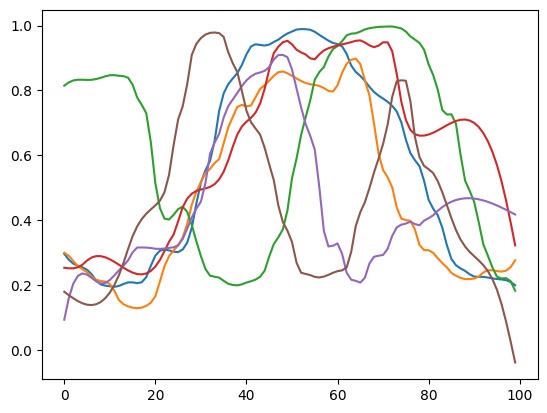

In [8]:
for key in ndvi_dict.keys():
    print(len(ndvi_dict[key]))
    plt.plot(ndvi_dict[key])

plt.show()

In [20]:
regions = ["ks", "mtb", "all"]
temp = pd.DataFrame(ndvi_dict)
ks_df = temp.T.iloc[0:3]

ks_mean_trajectory = []
ks_median_trajectory = []

for step in ks_df:
    mean = ks_df[step].mean()
    median = ks_df[step].median()
    ks_mean_trajectory.append(mean)
    ks_median_trajectory.append(median)

mtb_df = temp.T.iloc[3:6]
mtb_mean_trajectory = []
mtb_median_trajectory = []

for step in mtb_df:
    mean = mtb_df[step].mean()
    median = mtb_df[step].median()
    mtb_mean_trajectory.append(mean)
    mtb_median_trajectory.append(median)

all_median_trajectory = []
all_mean_trajectory = []

for step in temp.T:
    mean = temp.T[step].mean()
    median = temp.T[step].median()
    all_mean_trajectory.append(mean)
    all_median_trajectory.append(median)


for name in regions:
    ndvi_dict[f"{name}_mean"] = eval(f"{name}_mean_trajectory")
    ndvi_dict[f"{name}_median"] = eval(f"{name}_median_trajectory")

100
100
100
100
100
100
100
100
100
100
100
100


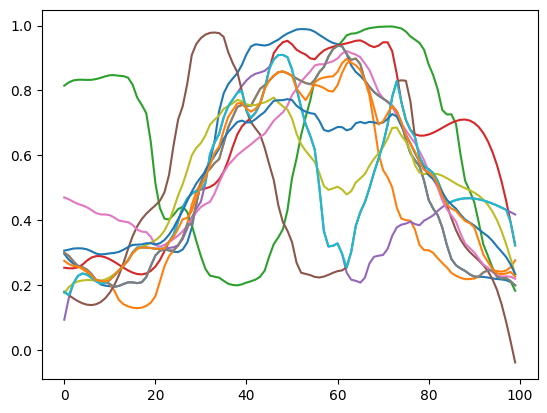

In [21]:
for key in ndvi_dict.keys():
    print(len(ndvi_dict[key]))
    plt.plot(ndvi_dict[key])

plt.show()

In [22]:
curves_df = pd.DataFrame(columns=[f"t{i}" for i in range(100)])
for key in ndvi_dict.keys():
    curves_df = curves_df.append(pd.Series(ndvi_dict[key], index=curves_df.columns), ignore_index=True)
curves_df

/tmp/ipykernel_3650/3564690051.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  curves_df = curves_df.append(pd.Series(ndvi_dict[key], index=curves_df.columns), ignore_index=True)


,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99
0,0.295960,0.277970,0.265609,0.259210,0.254473,0.246947,0.233261,0.214060,0.201652,0.197975,...,0.225929,0.224972,0.225016,0.223002,0.220216,0.218400,0.217068,0.214739,0.209256,0.199047
1,0.299428,0.289918,0.273293,0.257996,0.248777,0.238988,0.226201,0.215830,0.212230,0.210530,...,0.219926,0.225745,0.238607,0.245191,0.245392,0.242858,0.241235,0.244171,0.255312,0.276010
2,0.814705,0.824931,0.830827,0.832974,0.832963,0.832384,0.832807,0.835025,0.838809,0.843450,...,0.456260,0.393259,0.325568,0.290538,0.253893,0.225739,0.220160,0.221071,0.211870,0.182256
3,0.253138,0.251458,0.251404,0.254603,0.262681,0.275340,0.284751,0.289011,0.288958,0.285429,...,0.699842,0.687250,0.668709,0.643469,0.610776,0.569880,0.520029,0.460593,0.393314,0.322073
4,0.092912,0.160087,0.204665,0.228133,0.235508,0.231811,0.222058,0.211269,0.204463,0.206079,...,0.466521,0.464200,0.460773,0.456377,0.451151,0.445233,0.438762,0.431876,0.424713,0.417412
5,0.179003,0.168579,0.158772,0.150198,0.143474,0.139217,0.138043,0.140570,0.147413,0.159189,...,0.288644,0.275762,0.261253,0.242837,0.218239,0.185180,0.141445,0.087236,0.025905,-0.038988
6,0.470031,0.464273,0.456576,0.450060,0.445404,0.439440,0.430756,0.421639,0.417564,0.417319,...,0.300705,0.281325,0.263064,0.252910,0.239833,0.228999,0.226154,0.226660,0.225480,0.219104
7,0.299428,0.289918,0.273293,0.259210,0.254473,0.246947,0.233261,0.215830,0.212230,0.210530,...,0.225929,0.225745,0.238607,0.245191,0.245392,0.225739,0.220160,0.221071,0.211870,0.199047
8,0.175018,0.193375,0.204947,0.210978,0.213888,0.215456,0.214951,0.213617,0.213611,0.216899,...,0.485002,0.475737,0.463578,0.447561,0.426722,0.400098,0.366745,0.326568,0.281311,0.233499
9,0.179003,0.168579,0.204665,0.228133,0.235508,0.231811,0.222058,0.211269,0.204463,0.206079,...,0.466521,0.464200,0.460773,0.456377,0.451151,0.445233,0.438762,0.431876,0.393314,0.322073
